In [1]:
%matplotlib inline

In [17]:
import os
import json
import pandas as pd
import numpy as np
import statsmodels.api as sm
import datetime
from dateutil.parser import parse
import sys
sys.path.append("../Baserate")
from main.timeseries import evaluate_arima_model, evaluate_models, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

import matplotlib
matplotlib.style.use("fivethirtyeight");

In [3]:
MC_HOME = os.path.abspath("../..")
DATA_PATH = os.path.join(MC_HOME, "data")
GSR_PATH = os.path.join(DATA_PATH, "gsr")
CU_COUNT_GSR_PATH = os.path.join(GSR_PATH, "cu_count_gsr")
DISEASE_GSR_PATH = os.path.join(GSR_PATH, "disease_gsr")

P_MAX = 4
D_MAX = 2
Q_MAX = 4

In [4]:
os.listdir(CU_COUNT_GSR_PATH)

['Madaba_Monthly_Counts.json',
 'Tahrir_Weekly_Counts.json',
 'Jordan_Weekly_Counts.json',
 'Egypt_Daily_Counts.json',
 'Amman_Monthly_Counts.json',
 'Irbid_Monthly_Counts.json']

## Egypt Daily CU

In [ ]:
filename_ = "Egypt_Daily_Counts.json"
filepath_ = os.path.join(CU_COUNT_GSR_PATH, filename_)
with open(filepath_, "r", encoding="utf8") as f:
    gsr_ = json.load(f)
count_dict = {e["Event_Date"]: e["Case_Count"] for e in gsr_}
count_ser = pd.Series(count_dict)
count_ser.plot(figsize=(12,8))

In [ ]:
arma_bic_order = sm.tsa.stattools.arma_order_select_ic(count_ser)["bic_min_order"]
print(arma_bic_order)

Use a grid search to find ARIMA order

In [ ]:
evaluate_models(count_ser, range(P_MAX+1), range(D_MAX+1), range(Q_MAX+1))

## Tahrir Weekly CU

In [ ]:
filename_ = "Tahrir_Weekly_Counts.json"
filepath_ = os.path.join(CU_COUNT_GSR_PATH, filename_)
with open(filepath_, "r", encoding="utf8") as f:
    gsr_ = json.load(f)
count_dict = {e["Event_Date"]: e["Case_Count"] for e in gsr_}
count_ser = pd.Series(count_dict)
count_ser.plot(figsize=(12,8))

In [ ]:
arma_bic_order = sm.tsa.stattools.arma_order_select_ic(count_ser)["bic_min_order"]
print(arma_bic_order)

Use a grid search to find ARIMA order

In [ ]:
evaluate_models(count_ser, range(P_MAX+1), range(D_MAX+1), range(Q_MAX+1))

## Jordan Weekly CU

In [ ]:
filename_ = "Jordan_Weekly_Counts.json"
filepath_ = os.path.join(CU_COUNT_GSR_PATH, filename_)
with open(filepath_, "r", encoding="utf8") as f:
    gsr_ = json.load(f)
count_dict = {e["Event_Date"]: e["Case_Count"] for e in gsr_}
count_ser = pd.Series(count_dict)*1.0
count_ser.plot(figsize=(12,8))

In [ ]:
arma_bic_order = sm.tsa.stattools.arma_order_select_ic(count_ser)["bic_min_order"]
print(arma_bic_order)

Use a grid search to find ARIMA order

In [ ]:
evaluate_models(count_ser, range(P_MAX+1), range(D_MAX+1), range(Q_MAX+1))

## Amman Monthly CU

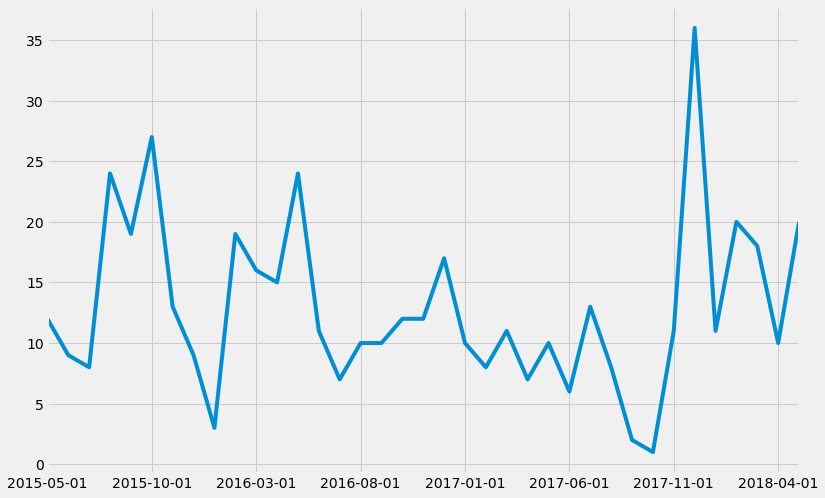

In [5]:
filename_ = "Amman_Monthly_Counts.json"
filepath_ = os.path.join(CU_COUNT_GSR_PATH, filename_)
with open(filepath_, "r", encoding="utf8") as f:
    gsr_ = json.load(f)
count_dict = {e["Event_Date"]: e["Case_Count"] for e in gsr_}
count_ser = pd.Series(count_dict)*1.0
count_ser.plot(figsize=(12,8))

In [ ]:
arma_bic_order = sm.tsa.stattools.arma_order_select_ic(count_ser)["bic_min_order"]
print(arma_bic_order)

Use a grid search to find ARIMA order

In [ ]:
evaluate_models(count_ser, range(P_MAX+1), range(D_MAX+1), range(Q_MAX+1))

Because the pure counts are white noise let's try using the logarithms

In [19]:
def antilog_err_func(err_func, predicted, actual, offset=1):
    """
    Applies err_func to predicted and actual after taking antilog
    :param err_func: A function that computes error
    :param predicted: predicted values
    :param actual: actual values
    :param offset: amount to be subtracted to convert to original scale
    :return: Error value
    """
    antilog_predicted = pd.Series(predicted).apply(lambda x: np.exp(x) - 1)
    antilog_predicted = antilog_predicted.apply(lambda x: round(x, 0))
    antilog_predicted = antilog_predicted.apply(lambda x: max(x, 0))
    antilog_actual = pd.Series(actual).apply(lambda x: np.exp(x) - 1)
    antilog_actual = antilog_actual.apply(lambda x: np.exp(x) -1)
    antilog_actual = antilog_actual.apply(lambda x: np.exp(x) - 1)
    return err_func(antilog_predicted, antilog_actual)

In [9]:
log_count_ser = np.log(count_ser+1)
print(log_count_ser.head())

2015-05-01    2.564949
2015-06-01    2.302585
2015-07-01    2.197225
2015-08-01    3.218876
2015-09-01    2.995732
dtype: float64


In [10]:
evaluate_models(log_count_ser, range(P_MAX+1), range(D_MAX+1), range(Q_MAX+1))

Final Best ARIMA  (0, 0, 1) MSE = 0.537


In [20]:
err_func_ = lambda x, y: antilog_err_func(mean_squared_error, x, y)
evaluate_arima_model(log_count_ser, (0, 0, 1), err_func_)

inf

## Irbid Monthly CU

In [ ]:
filename_ = "Irbid_Monthly_Counts.json"
filepath_ = os.path.join(CU_COUNT_GSR_PATH, filename_)
with open(filepath_, "r", encoding="utf8") as f:
    gsr_ = json.load(f)
count_dict = {e["Event_Date"]: e["Case_Count"] for e in gsr_}
count_ser = pd.Series(count_dict)*1.0
count_ser.plot(figsize=(12,8))

In [ ]:
arma_bic_order = sm.tsa.stattools.arma_order_select_ic(count_ser)["bic_min_order"]
print(arma_bic_order)

Use a grid search to find ARIMA order

In [ ]:
evaluate_models(count_ser, range(P_MAX+1), range(D_MAX+1), range(Q_MAX+1))

## Madaba Monthly CU

In [ ]:
filename_ = "Madaba_Monthly_Counts.json"
filepath_ = os.path.join(CU_COUNT_GSR_PATH, filename_)
with open(filepath_, "r", encoding="utf8") as f:
    gsr_ = json.load(f)
count_dict = {e["Event_Date"]: e["Case_Count"] for e in gsr_}
count_ser = pd.Series(count_dict)*1.0
count_ser.plot(figsize=(12,8))

In [ ]:
arma_bic_order = sm.tsa.stattools.arma_order_select_ic(count_ser)["bic_min_order"]
print(arma_bic_order)

Use a grid search to find ARIMA order

In [ ]:
evaluate_models(count_ser, range(P_MAX+1), range(D_MAX+1), range(Q_MAX+1))

## Disease Count Series

In [ ]:
os.listdir(DISEASE_GSR_PATH)

In [ ]:
filename_ = "Saudi_Arabia_Weekly_MERS_Counts.json"
filepath_ = os.path.join(DISEASE_GSR_PATH, filename_)
with open(filepath_, "r", encoding="utf8") as f:
    gsr_ = json.load(f)
count_dict = {e["Event_Date"]: e["Case_Count"] for e in gsr_}
count_ser = pd.Series(count_dict)
count_ser.plot(figsize=(12,8))